# Explore Bottle File Data from GO-SHIP

### In this notebook we will plot data from a bottle file, collected on a repeat hydrographic section part of the GO-SHIP repeat hydrographic program.

All hydrographic data part of this progam are publicly avaiable and are archived at [CCHDO](https://cchdo.ucsd.edu/). The section analyzed here (P18) is a meridonal transect in the eastern Pacific roughly along the 103$^o$W meridian. Section data is available at https://cchdo.ucsd.edu/cruise/33RO20161119. The netCDF file for the bottle data can be downloaded [here](https://cchdo.ucsd.edu/data/38327/33RO20161119_nc_hyd.zip).

In [40]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

plt.rcParams["font.size"] = 16
plt.rcParams["figure.facecolor"] = 'white'
import warnings
warnings.filterwarnings('ignore')

datapath = './data/'

In [62]:
# Load netCDF file locally as xarray Dataset

dd = xr.load_dataset(datapath+'p18_btl.nc')
dd

<xarray.Dataset>
Dimensions:                            (N_LEVELS: 24, N_PROF: 213)
Coordinates:
    expocode                           (N_PROF) object '33RO20161119' ... '33...
    station                            (N_PROF) object '1' '2' ... '211' '212'
    cast                               (N_PROF) int32 3 2 1 1 1 1 ... 1 1 1 1 1
    sample                             (N_PROF, N_LEVELS) object '24' ... '1'
    time                               (N_PROF) datetime64[ns] 2016-11-24T14:...
    latitude                           (N_PROF) float64 22.69 22.87 ... -68.07
    longitude                          (N_PROF) float64 -110.0 -110.0 ... -95.0
    pressure                           (N_PROF, N_LEVELS) float64 3.1 ... 4.5...
Dimensions without coordinates: N_LEVELS, N_PROF
Data variables: (12/86)
    section_id                         (N_PROF) object 'P18' 'P18' ... 'P18'
    bottle_number                      (N_PROF, N_LEVELS) object '11122' ... ...
    bottle_number_qc                   (N_PROF, N_LEVELS) float32 2.0 ... 2.0
    btm_depth                          (N_PROF) float64 2.619e+03 ... 4.429e+03
    ctd_temperature                    (N_PROF, N_LEVELS) float64 27.88 ... 0...
    ctd_salinity                       (N_PROF, N_LEVELS) float64 34.53 ... 34.7
    ...                                 ...
    n2_argon_ratio_unstripped_error    (N_PROF, N_LEVELS) float64 nan ... nan
    d15n_n2                            (N_PROF, N_LEVELS) float64 nan ... nan
    d15n_n2_qc                         (N_PROF, N_LEVELS) float32 nan ... nan
    d15n_n2_error                      (N_PROF, N_LEVELS) float64 nan ... nan
    profile_type                       (N_PROF) object 'B' 'B' 'B' ... 'B' 'B'
    geometry_container                 float64 nan
Attributes:
    Conventions:               CF-1.8 CCHDO-1.0
    cchdo_software_version:    hydro 1.0.2.8
    cchdo_parameters_version:  params 2024.4.0
    comments:                  BOTTLE,20230606CCHSIOCBG\n Merged parameters: ...
    featureType:               profile

In [70]:
# List the variables in this bottle file
all_vars = [i for i in dd.data_vars] 
print(all_vars)

['section_id', 'bottle_number', 'bottle_number_qc', 'btm_depth', 'ctd_temperature', 'ctd_salinity', 'ctd_salinity_qc', 'bottle_salinity', 'bottle_salinity_qc', 'ctd_oxygen', 'ctd_oxygen_qc', 'oxygen', 'oxygen_qc', 'silicate', 'silicate_qc', 'nitrate', 'nitrate_qc', 'nitrite', 'nitrite_qc', 'phosphate', 'phosphate_qc', 'cfc_11', 'cfc_11_qc', 'cfc_12', 'cfc_12_qc', 'sulfur_hexifluoride', 'sulfur_hexifluoride_qc', 'total_carbon', 'total_carbon_qc', 'total_alkalinity', 'total_alkalinity_qc', 'ph_sws', 'ph_sws_qc', 'ph_temperature', 'dissolved_organic_carbon', 'dissolved_organic_carbon_qc', 'del_carbon_13_dic', 'del_carbon_13_dic_qc', 'del_carbon_14_dic', 'del_carbon_14_dic_qc', 'del_carbon_14_dic_error', 'particulate_organic_carbon', 'particulate_organic_carbon_qc', 'particulate_organic_nitrogen', 'particulate_organic_nitrogen_qc', 'total_dissolved_phosphorus', 'total_dissolved_phosphorus_qc', 'total_dissolved_nitrogen', 'total_dissolved_nitrogen_qc', 'carbon_tetrachloride', 'carbon_tetrac

In [69]:
exclude_vars = ['bottle_number']  # exclude these variables

vars_of_interest = [i for i in all_vars if '_qc' not in i 
                    and i not in exclude_vars 
                    and len(dd[i].dims)==2]
print(vars_of_interest)

['ctd_temperature', 'ctd_salinity', 'bottle_salinity', 'ctd_oxygen', 'oxygen', 'silicate', 'nitrate', 'nitrite', 'phosphate', 'cfc_11', 'cfc_12', 'sulfur_hexifluoride', 'total_carbon', 'total_alkalinity', 'ph_sws', 'ph_temperature', 'dissolved_organic_carbon', 'del_carbon_13_dic', 'del_carbon_14_dic', 'del_carbon_14_dic_error', 'particulate_organic_carbon', 'particulate_organic_nitrogen', 'total_dissolved_phosphorus', 'total_dissolved_nitrogen', 'carbon_tetrachloride', 'nitrous_oxide', 'nitrous_oxide_l_alt_1', 'dissolved_organic_carbon_14', 'dissolved_organic_carbon_14_error', 'dissolved_organic_carbon_13', 'd15n_no3', 'd15n_no3_error', 'd15n_n2o', 'd15n_alpha_n2o', 'd15n_nitrite_nitrate', 'd18o_nitrite_nitrate', 'd18o_nitrate', 'd18o_nitrust_oxide', 'n2_argon_ratio', 'n2_argon_ratio_error', 'n2_argon_ratio_unstripped', 'n2_argon_ratio_unstripped_error', 'd15n_n2', 'd15n_n2_error']


In [71]:
# Calculate Depth as a function of pressure, latitude
depth = gsw.z_from_p(dd.pressure,
                     dd.latitude,)

### We can plot some of these variables of interest in a subplot together

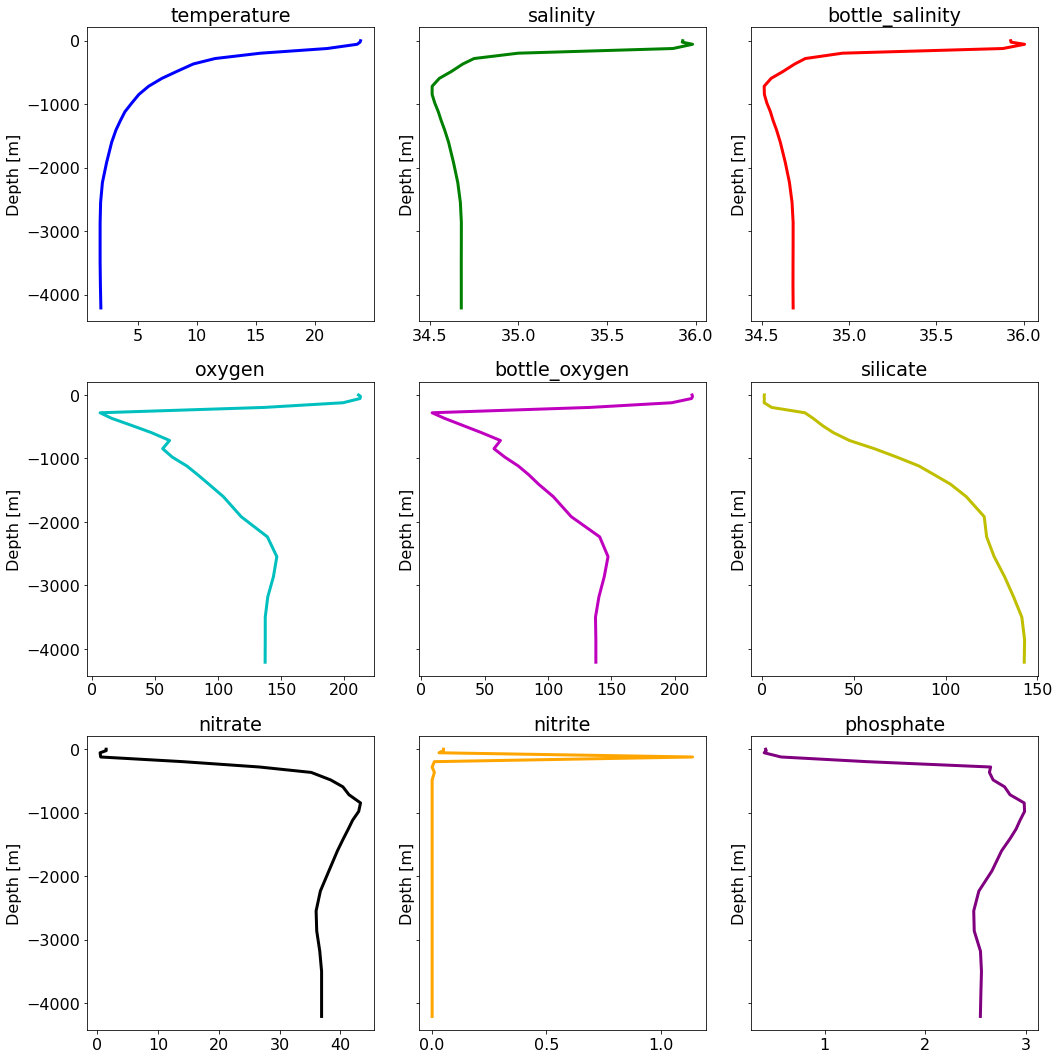

In [29]:
# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

fig, axs = plt.subplots(3, 3, figsize=(15, 15),sharey=True)
# Loop through variables and plot in each subplot
for i, var in enumerate(vars_of_interest[:9]):
    # Calculate subplot index
    row = i // 3
    col = i % 3
    
    # Plot variable on the corresponding subplot
    axs[row, col].plot(dd[var],depth, 
                       label=var,linewidth='3',color=colors[i])
    axs[row, col].set_title(var)
    axs[row, col].set_ylabel('Depth [m]')

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

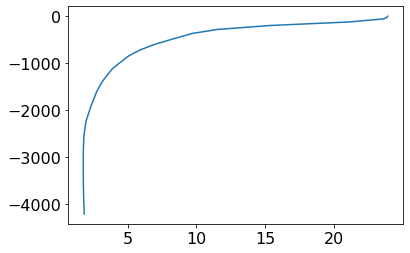

In [38]:
plt.plot(dd.temperature,dd.depth)
